## PREDICTION USING SUPERVISED LEARNING BY :- GITANSHU SAXENA INTERN AT SPARKS FOUNDATION  

### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Read the data using pandas method read_csv
data = pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
# Checking the top 5 values using head() method 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking Last 5 values
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# Checking the shape of the Dataset
data.shape

(25, 2)

In [5]:
# Columns names in dataset
data.columns

Index(['Hours', 'Scores'], dtype='object')

#### Describe method tells all the detailed Analysis of the dataset

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### For Visulaing our data we use matplotlib library and using this we plot Scatter Plot and from seaborn we plot histogram for Hours and Scores

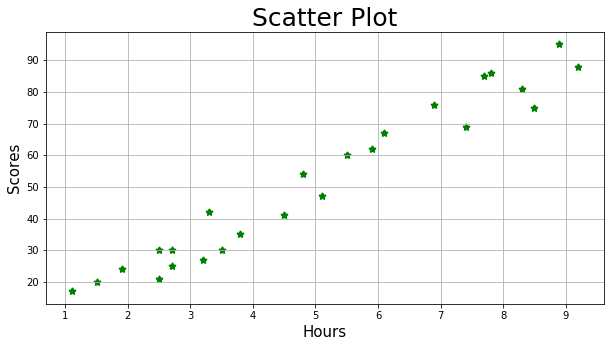

In [10]:
plt.figure(figsize = (10,5))
plt.grid()
plt.scatter(data['Hours'],data['Scores'],marker = '*',color = 'r',edgecolors = 'g',linewidths=2)
plt.title("Scatter Plot",fontsize = 25)
plt.xlabel("Hours",fontsize = 15)
plt.ylabel("Scores",fontsize = 15)
plt.show()

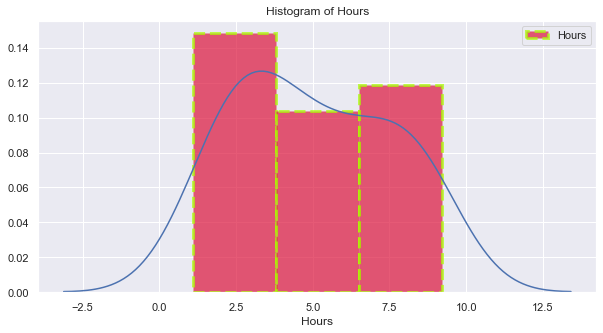

In [11]:
plt.figure(figsize = (10,5))
sns.set()
sns.distplot(data["Hours"],label = "Hours",
             hist_kws={'color':'#DC143C','edgecolor':'#aaff00','linewidth':3,'linestyle':'--','alpha':0.7})
plt.title("Histogram of Hours")
plt.legend()
plt.show()

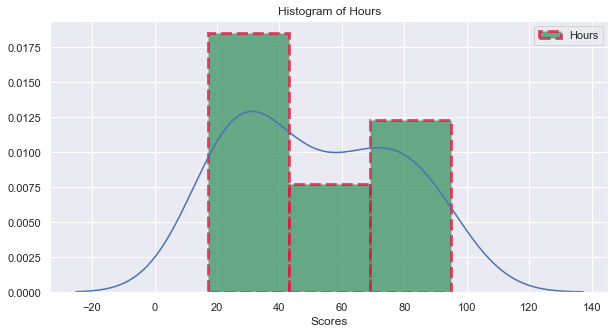

In [12]:
plt.figure(figsize = (10,5))
sns.set()
sns.distplot(data["Scores"],label = "Hours",
             hist_kws={'color':'seagreen','edgecolor':'crimson','linewidth':3,'linestyle':'--','alpha':0.7})
plt.title("Histogram of Hours")
plt.legend()
plt.show()

## Splitting our our Dataset(Hours and Scores) into x and y variables

In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### From sklearn module importing required libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [15]:
# Splitting our Dataset into traing and testing(This technique is basically used for larger Dataset but for better understanding we have used this) 
train_x,test_x,train_y,test_y = train_test_split(x ,y ,test_size = 0.2, random_state = 0)

In [16]:
print("Shape of train_x is {}".format(train_x.shape))
print("Shape of train_y is {}".format(train_y.shape))
print("Shape of test_x is {}".format(test_x.shape))
print("Shape of test_y is {}".format(test_y.shape))

Shape of train_x is (20, 1)
Shape of train_y is (20,)
Shape of test_x is (5, 1)
Shape of test_y is (5,)


## Training our Linear Regression Model 

In [17]:
lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Calculating the Pediction Values 

In [18]:
pred_y = lr.predict(test_x)
print("Prediction value is calculated {}".format(pred_y))

Prediction value is calculated [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [19]:
print("Test Values Of Hours are {}".format(test_x))

Test Values Of Hours are [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##  Predicted score if a student studies for 9.25 hrs/ day

In [20]:
hour = 9.25
test_value = np.array(hour)
test_value = test_value.reshape(-1,1)
pred = lr.predict(test_value)
print("Given Task Predited Value is {}".format(pred))

Given Task Predited Value is [93.69173249]


### Creating the DataFrame to properly see the difference between the actual and the predicted values 

In [21]:
pd.DataFrame({'Actual':test_y,'predicted':pred_y})

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Drawing line Plot for better visualisation after prediction  

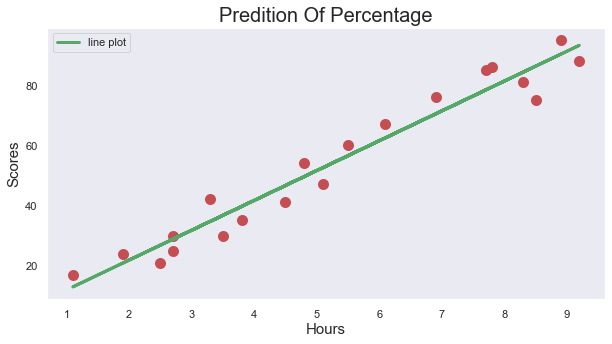

In [23]:
plt.figure(figsize =(10,5))
plt.grid()
plt.scatter(train_x ,train_y ,color = 'r' ,marker = 'o',linewidths=5)
plt.plot(train_x ,lr.predict(train_x),linewidth = 3,c = 'g')
plt.title("Predition Of Percentage",fontsize = 20)
plt.xlabel("Hours",fontsize = 15)
plt.ylabel("Scores",fontsize = 15)
plt.legend(['line plot'],loc = 2)

### Checking the MSE ,MAE & RMS error. 

In [24]:
mse = mean_squared_error(test_y,pred_y)
abe = mean_absolute_error(test_y,pred_y)
rms = np.sqrt(mse)
print("Mean Squared Error is----------->{}".format(mse))
print("Mean Absolute Error is---------->{}".format(abe))
print("Root Mean Squared Error is ----->{}".format(rms))

Mean Squared Error is----------->21.5987693072174
Mean Absolute Error is---------->4.183859899002975
Root Mean Squared Error is ----->4.6474476121003665


In [25]:
print("The value of Coefficient is {}".format(lr.coef_))

The value of Coefficient is [9.91065648]


In [26]:
print("The Value of Intercept is {}".format(lr.intercept_))

The Value of Intercept is 2.018160041434683


In [27]:
test_y

array([20, 27, 69, 30, 62], dtype=int64)

In [28]:
pred_y

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### score() method shows how accurate our model 

In [29]:
lr.score(test_x,test_y)

0.9454906892105356